# Clustering US Senators using K-Means

## Objective

Use K-means clustering to group together US Senators.

## Data Set

The data set contains all the votes from the 114th Senate that can be downloaded from [here](https://www.dropbox.com/s/uzkv79ecxccz36h/114_congress.csv?dl=0). Each row contains the votes of an individual senator. Votes are coded as 0 for “No”, 1 for “Yes”, and 0.5 for “Abstain”.

Here are the first three rows of the data:

    name,party,state,00001,00004,00005,00006,00007,00008,00009,00010,00020,00026,00032,00038,00039,00044,00047
    Alexander,R,TN,0,1,1,1,1,0,0,1,1,1,0,0,0,0,0
    Ayotte,R,NH,0,1,1,1,1,0,0,1,0,1,0,1,0,1,0

## Reading In the Data

In [2]:
import pandas as pd

votes = pd.read_csv("C:/Users/i7/csv/114_congress.csv")
print(votes.shape)

# Comparison between "Yes" votes than "No" votes overall
print(pd.value_counts(votes.iloc[:,3:].values.ravel()))

(100, 18)
1.0    803
0.0    669
0.5     28
dtype: int64


## Initial K-Means Clustering

Specify the number of clusters. Try 2 to see how it looks.

In [3]:
from sklearn.cluster import KMeans

# Create a kmeans model on the data, using 2 clusters.  random_state helps ensure that the algorithm returns the same results each time.
kmeans_model = KMeans(n_clusters=2, random_state=1).fit(votes.iloc[:, 3:])

# Fitted labels for clusters -- the first cluster has label 0, and the second has label 1.
labels = kmeans_model.labels_

print(pd.crosstab(labels, votes["party"]))


party   D  I   R
row_0           
0      41  2   0
1       3  0  54


## Exploring People in the Wrong Cluster

Find out which senators are in the “wrong” cluster.

In [4]:
democratic_oddballs = votes[(labels == 1) & (votes["party"] == "D")]
print(democratic_oddballs["name"])

42    Heitkamp
56     Manchin
74        Reid
Name: name, dtype: object


## Plotting Out the Clusters

Use principal component analysis to compress the vote columns into two.(can’t visualize 15 dimensions)

Then, plot out all of the senators according to their votes, and shade them by their k-means cluster.

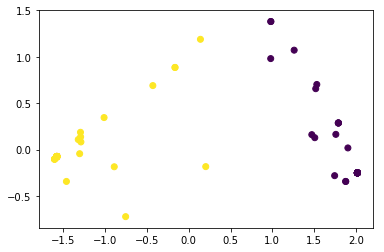

In [9]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
%matplotlib inline

pca_2 = PCA(2)

# Turn the vote data into two columns with PCA
plot_columns = pca_2.fit_transform(votes.iloc[:,3:18])

# Plot senators based on the two dimensions, and shade by cluster label
plt.scatter(x=plot_columns[:,0], y=plot_columns[:,1], c=labels)
plt.show()

## Trying even More Clusters

Using 5 clusters to see what happens.

In [11]:
kmeans_model_5 = KMeans(n_clusters=5, random_state=1).fit(votes.iloc[:, 3:])
labels = kmeans_model_5.labels_

print(pd.crosstab(labels, votes["party"]))

party   D  I   R
row_0           
0       6  0   0
1       0  0  52
2      31  1   0
3       0  0   2
4       7  1   0


The republicans are still pretty solid, but it looks like there are two democratic "factions"